<a href="https://colab.research.google.com/github/Ahmethan96/Data_science/blob/main/01_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [2]:
torch.__version__

'2.0.1+cu118'

## **1. Data (preparing and loading)**

Data can be almost anything... in machine learing.

* Excel speadsheet
* Images of any kind
* Videos (YouTube has lots of data...)
* Audio like songs or podcastes
* DNA
* Text


Machine learing is a game of two parts:
1. Get data into a numerical representation
2. Build a model to learn patterns in that numerical representation.

To showcase this, let's create some *known* data using the linear regression formula.

we'll use a linear regression formula to make a straight line with known **parameters**

In [3]:
import torch
# Create known parameters
weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim= 1)
Y = weight * X + bias

X[:10], Y[:10], len(X), len(Y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

In [4]:
X.ndim # braket sayisi

2

In [5]:
X.shape #(satir, sutun)

torch.Size([50, 1])

In [6]:
Y

tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260],
        [0.4400],
        [0.4540],
        [0.4680],
        [0.4820],
        [0.4960],
        [0.5100],
        [0.5240],
        [0.5380],
        [0.5520],
        [0.5660],
        [0.5800],
        [0.5940],
        [0.6080],
        [0.6220],
        [0.6360],
        [0.6500],
        [0.6640],
        [0.6780],
        [0.6920],
        [0.7060],
        [0.7200],
        [0.7340],
        [0.7480],
        [0.7620],
        [0.7760],
        [0.7900],
        [0.8040],
        [0.8180],
        [0.8320],
        [0.8460],
        [0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

### Splitting data into training and test sets (one of the most important concepts in machine learning in general)
let's create a training and test set with our data.

In [7]:
z =  [x for x in range(10)]
z

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [8]:
ss = z[:5]
ss

[0, 1, 2, 3, 4]

In [9]:
zz = z[5:]
zz

[5, 6, 7, 8, 9]

In [10]:
gg = ss + zz
gg

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [11]:
len(X)

50

In [12]:
print(0.8 * len(X))

40.0


In [13]:
# Create a train/test split
train_split = int(0.8 * len(X))
X_train, Y_train = X[:train_split], Y[:train_split] # from 0 to 40
X_test, Y_test = X[train_split:], Y[train_split:] # from 40 to the end (50)

len(X_train), len(Y_train), len(X_test), len(Y_test)

(40, 40, 10, 10)

In [14]:
ibo = torch.tensor([[4, 4]])
ibo

tensor([[4, 4]])

In [15]:
def plot_prediction(train_data= X_train,
                    train_labels= Y_train,
                    test_data= X_test,
                    test_labels= Y_test,
                    predictions= None):
  plt.figure(figsize= (10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c= "b", s= 4, label= "Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c= "g", s= 4, label= "Testing data")

  # Are there prediction?
  if predictions is not None:
    # Plot the prediction if they exist
    plt.scatter(test_data, predictions, c= "r", s= 4, label= "Predictions")

  # Show the legend
  plt.legend(prop= {"size": 14});


In [16]:
w = [x for x in range (10)] # [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
z = [j for j in range(10, 20)] # [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


In [17]:
def plot_ibo(x_axis= w,
         y_axis= z):
  plt.figure(figsize= (10, 7))
  plt.scatter(x_axis, y_axis, c= "b", s= 4, label= "Training data")

  plt.legend(prop= {"size": 14});

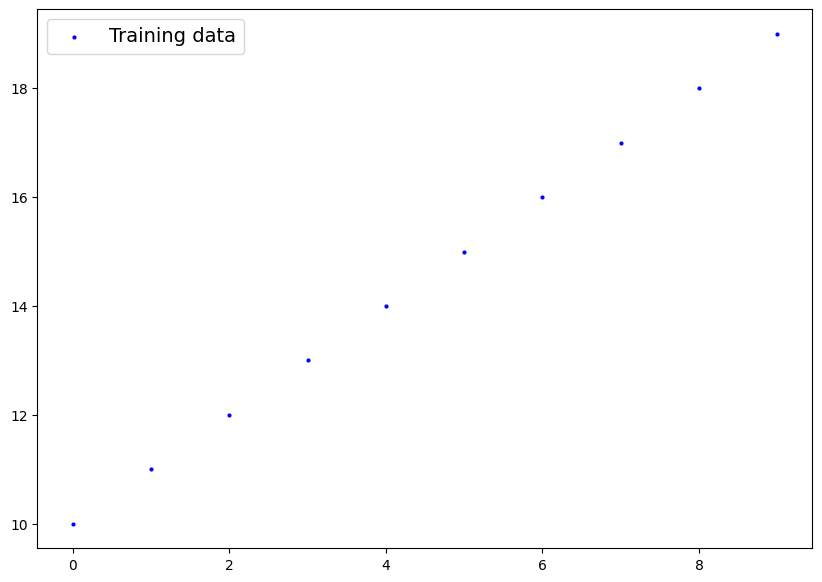

In [18]:
plot_ibo() # Linear line

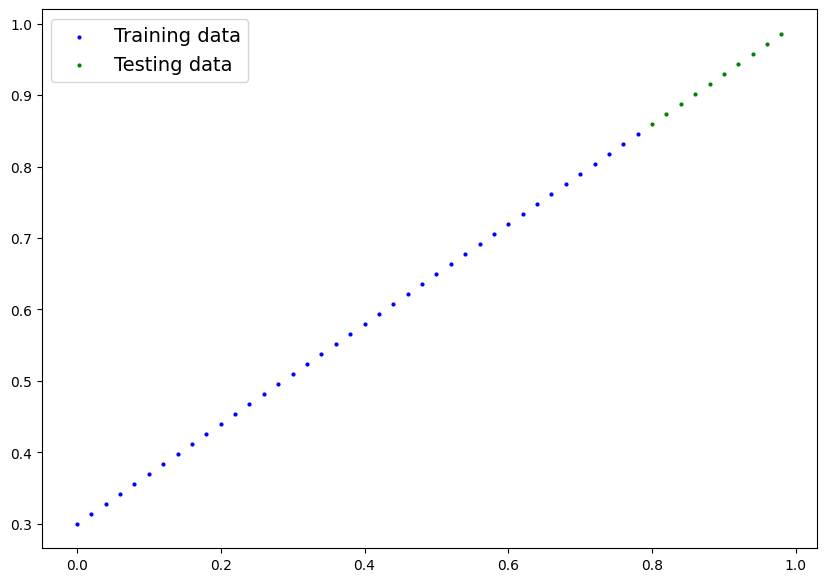

In [19]:
plot_prediction();

## **2. Build model**

Our first PyTorch model!
This is very exciting... let's do it!

Because we are going to be building classes throughout the course, I'd recomend getting familiar with OOP in Python, to do so you can use the following resourse from real Python: https://realpython.com/python3-object-oriented-programming/

what our model does:
* Start with random values(weight and bias)
* Look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weight and bias values er used to create the data)

How does it do so?

Through two main algorithms:
1. Gradient descent
2. Backpropagation


In [20]:
from torch import nn

# Create linear regression model class

class LinearRegressionModel(nn.Module): # <- alomst everything in
                                 # Pytorch inherhits from nn.Module
                                def __init__(self):
                                  super().__init__()
                                  # Initilize the model parameters
                                  self.weights = nn.Parameter(torch.randn(1, requires_grad= True, dtype= torch.float))

                                  self.bias = nn.Parameter(torch.randn(1, requires_grad= True, dtype= torch.float))






                                  # Forward method to define the computation in the model
                                def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data
                                    return self.weights * x + self.bias # this is the linear regression formula




**PyTorch model building essentials**

* torch.nn - contains all of the building for computational graphs (a neural network can be considered a computational graph)

* torch.nn.Parameter - what parameters should our model try and learn, often a
PyTorch layer from torch.nn will set these for us

* torch.nn.Module - The base class for all neural network modules, if you subclass it, you should overwrite forward()

* torch.optim - this is where the optimizers in PyTorch live, they will help with gradient descent

* def forward(), this method defines what happens in the forward computation

check: https://pytorch.org/tutorials/beginner/ptcheat.html


### Checking the contents of our PyTorch model

Now we've created a model, let's see what's inside...

So we can check our model parameters or what's inside our model using .parameters().


In [21]:
# Create a random seed
# torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()


list(model_0.parameters())

[Parameter containing:
 tensor([-0.6878], requires_grad=True),
 Parameter containing:
 tensor([1.5132], requires_grad=True)]

In [22]:
model_0(X_test)

tensor([[0.9630],
        [0.9493],
        [0.9355],
        [0.9218],
        [0.9080],
        [0.8943],
        [0.8805],
        [0.8667],
        [0.8530],
        [0.8392]], grad_fn=<AddBackward0>)

In [23]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([-0.6878])), ('bias', tensor([1.5132]))])

In [24]:
weight, bias

(0.7, 0.3)

### Making prediction using torch.inference_mode()

To check our model's predictive power, let's see how well it predictis y_test based on x_test.

When we pass data through our model, it's going to run it through the forward()
method.

In [25]:
X_test, Y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [26]:
X_train, Y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

In [27]:
with torch.inference_mode():
  y_prediction = LinearRegressionModel()

y_prediction

LinearRegressionModel()

In [28]:
# Make prediction with model

with torch.inference_mode():
  y_preds = model_0(X_test)


y_preds

tensor([[0.9630],
        [0.9493],
        [0.9355],
        [0.9218],
        [0.9080],
        [0.8943],
        [0.8805],
        [0.8667],
        [0.8530],
        [0.8392]])

In [29]:
Y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

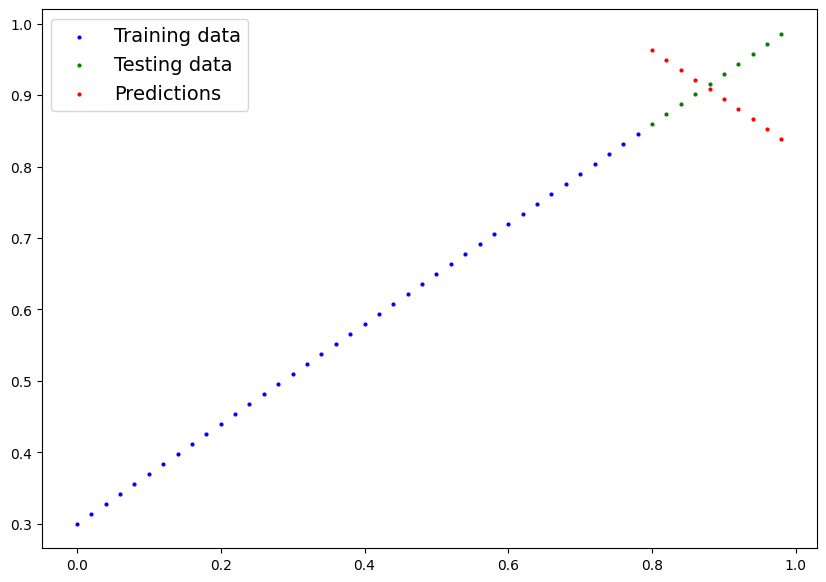

In [30]:
plot_prediction(predictions= y_preds)

## 3. Train model

The whole idea of training is for a model to move from some *unknown* parameters
(thsese may be random) to some *known* parameters.

Or in other words from a poor represntation of the data to a better representation of the data.

One way to measure how poor or how wrong models predictions are to use a loss function.

* Note: Loss function may also be called cost function or criterion in different
areas. For our case, we're going to refer to it as a loss function.

Things we need to train:

* **Loss function:** A function to measure how wrong your model's predictions are to the ideal outputs, lower is better

* **Optimizer:** Takes into account the loss of a model and adjust the model's
parameters (e.g, weights & bias) to imporve the loss function.

And specifically for PyTorch, we need:
* A training loop
* A testing loop


In [31]:
list(model_0.parameters())

[Parameter containing:
 tensor([-0.6878], requires_grad=True),
 Parameter containing:
 tensor([1.5132], requires_grad=True)]

In [32]:
# Check out our model's parameters (a parameter is a value that the model sets itself)
model_0.state_dict()

OrderedDict([('weights', tensor([-0.6878])), ('bias', tensor([1.5132]))])

In [33]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params= model_0.parameters(), lr= 0.01) # lr = is
# the most important hyperparameter you can set

In [38]:
X_train.T

tensor([[0.0000, 0.0200, 0.0400, 0.0600, 0.0800, 0.1000, 0.1200, 0.1400, 0.1600,
         0.1800, 0.2000, 0.2200, 0.2400, 0.2600, 0.2800, 0.3000, 0.3200, 0.3400,
         0.3600, 0.3800, 0.4000, 0.4200, 0.4400, 0.4600, 0.4800, 0.5000, 0.5200,
         0.5400, 0.5600, 0.5800, 0.6000, 0.6200, 0.6400, 0.6600, 0.6800, 0.7000,
         0.7200, 0.7400, 0.7600, 0.7800]])

In [40]:
Y_train.T

tensor([[0.3000, 0.3140, 0.3280, 0.3420, 0.3560, 0.3700, 0.3840, 0.3980, 0.4120,
         0.4260, 0.4400, 0.4540, 0.4680, 0.4820, 0.4960, 0.5100, 0.5240, 0.5380,
         0.5520, 0.5660, 0.5800, 0.5940, 0.6080, 0.6220, 0.6360, 0.6500, 0.6640,
         0.6780, 0.6920, 0.7060, 0.7200, 0.7340, 0.7480, 0.7620, 0.7760, 0.7900,
         0.8040, 0.8180, 0.8320, 0.8460]])

In [44]:
y_preds.T

tensor([[0.9630, 0.9493, 0.9355, 0.9218, 0.9080, 0.8943, 0.8805, 0.8667, 0.8530,
         0.8392]])

In [45]:
Y_train.T

tensor([[0.3000, 0.3140, 0.3280, 0.3420, 0.3560, 0.3700, 0.3840, 0.3980, 0.4120,
         0.4260, 0.4400, 0.4540, 0.4680, 0.4820, 0.4960, 0.5100, 0.5240, 0.5380,
         0.5520, 0.5660, 0.5800, 0.5940, 0.6080, 0.6220, 0.6360, 0.6500, 0.6640,
         0.6780, 0.6920, 0.7060, 0.7200, 0.7340, 0.7480, 0.7620, 0.7760, 0.7900,
         0.8040, 0.8180, 0.8320, 0.8460]])

**Building a training loop (and a testing loop) in PyTorch**

A couple of things we need in a training loop:

0. Loop throug the data
1. Forward pass (this involves data moving through our model's 'forward()' function) to make prediction on data - also called forward propagation
2. Claculate the loss (compare forward pass prediction to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backwards throug the network to calculate the gradients of each of parameters of our model with respect to the loss (**backpropagation**)
5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss  (**gradient descent**)


In [35]:
 # An epoch is one loop through the data... (this is a hyperparameter because we've set it ourselves)

epochs = 1


 # 0. Loop through the data

for epoch in range(epochs):
  # Set the model to training mode
  model_0.train() # train mode in PyTorch sets all parameters that require gradients to require gradients

  # 1. Forward pass
  y_pred = model_0()

  # 2. Calculate the loss
  loss = loss_fn(y_preds, Y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation on the loss with respect to the parameters of the
  # model
  loss.backward()

  # 5. Step the optimizer (perform gradient descent)
  optimizer.step() # by default how the optimizer changes will acculumate
  # through the loop so ... we have to zero them above in step 3 for the next
  # iteration

  model_0.eval() # turns off gradient tracking



